# LES simple animation

In [13]:
# load packages
using Plots
using NCDatasets
using Statistics: mean


Setup run-time enviromnent

In [14]:
ENV["GKSwstype"] = "100"

"100"

Specify needed directories and filenames: these will be replaced automatically by the bash run script or can be modified manually

In [15]:
CLIMA_NETCDF = "../netcdf/";

Get the current and previous  GCM netcdf file names in the CLIMA_NETCDF directory

In [16]:
fnames = filter(x -> occursin(".nc", x), readdir( CLIMA_NETCDF ) );

filename = "$CLIMA_NETCDF"fnames[3] # selects the last file on list
print(fnames)

["DYCOMS_DumpAux-2020-09-19T00.20.20.12.nc", "DYCOMS_DumpAux-2020-09-19T00.53.18.553.nc", "DYCOMS_DumpAux-2020-09-19T08.18.57.636.nc", "DYCOMS_DumpState-2020-09-19T00.20.20.12.nc", "DYCOMS_DumpState-2020-09-19T00.53.18.553.nc", "DYCOMS_DumpState-2020-09-19T08.18.57.636.nc"]

extract data

In [20]:
ds = NCDataset(filename, "r");
print(ds)
x = ds["x"][:];
y = ds["y"][:];
z = ds["z"][:];
time = ds["time"][:];

ρqliq = ds["moisture.q_liq"][:];



NCDataset: ../netcdf/DYCOMS_DumpAux-2020-09-19T08.18.57.636.nc
Group: /

Dimensions
   x = 21
   y = 21
   z = 31
   time = 4

Variables
  x   (21)
    Datatype:    Float64
    Dimensions:  x

  y   (21)
    Datatype:    Float64
    Dimensions:  y

  z   (31)
    Datatype:    Float64
    Dimensions:  z

  time   (4)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = seconds since 1900-01-01 00:00:00
     long_name            = time

  ∫dz.radiation.attenuation_coeff   (21 × 21 × 31 × 4)
    Datatype:    Float64
    Dimensions:  x × y × z × time

  ∫dnz.radiation.attenuation_coeff   (21 × 21 × 31 × 4)
    Datatype:    Float64
    Dimensions:  x × y × z × time

  coord[1]   (21 × 21 × 31 × 4)
    Datatype:    Float64
    Dimensions:  x × y × z × time

  coord[2]   (21 × 21 × 31 × 4)
    Datatype:    Float64
    Dimensions:  x × y × z × time

  coord[3]   (21 × 21 × 31 × 4)
    Datatype:    Float64
    Dimensions:  x × y × z × time

  orientation.Φ 

In [18]:

function get_min_max(var);
    vmax = maximum(filter(!isnan,var))
    vmin = minimum(filter(!isnan,var))
    return vmin,vmax
    none
end




get_min_max (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /central/scratch/elencz/output/test_les-run/analysis/plot_y_slice_anim.gif
└ @ Plots /home/elencz/.julia/packages/Plots/M1wcx/src/animation.jl:104


Plots.AnimatedGif("/central/scratch/elencz/output/test_les-run/analysis/plot_y_slice_anim.gif")
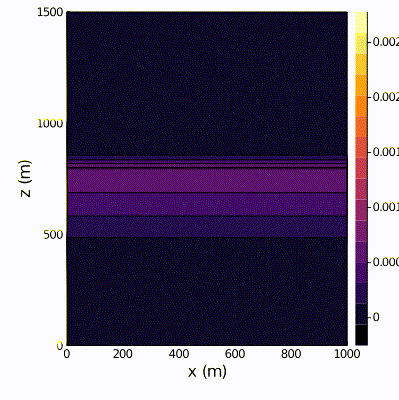

In [19]:
# Animation
clims = ( get_min_max(ρqliq) )
diag_dt_days =  (time[2] - time[1]).value / (1000*60*60*24) # get simtime

anim = @animate for t_i in 1:length(time)
    one_plot = contourf( x, z, (ρqliq[:,y_i,:,t_i] )',  xlabel="x (m)", ylabel="z (m)", clims = clims)   
    plot(one_plot, layout=(1,1), size=(400, 400) ) 
end
mp4(anim, "plot_y_slice_anim.gif", fps = 3) # hide


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*